# K Means Clustering Project 

Goal: Group Universites into 2 group.
    Use the predefined labels to determine how accurate the clusters were.

Note to self: 
- Use to group data when you don't have labels for outcomes. Essentially a way to create labels


## Import Libraries

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

## Get the Data

In [170]:
df = pd.read_csv('College_Data.csv', index_col=0)
print(df.shape)
# print(df.describe())
df.head(2)

(777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


## Exploratory Data Analysis

**Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Room and Board Cost vs Graduation Rate. Hue: Private/Shared')

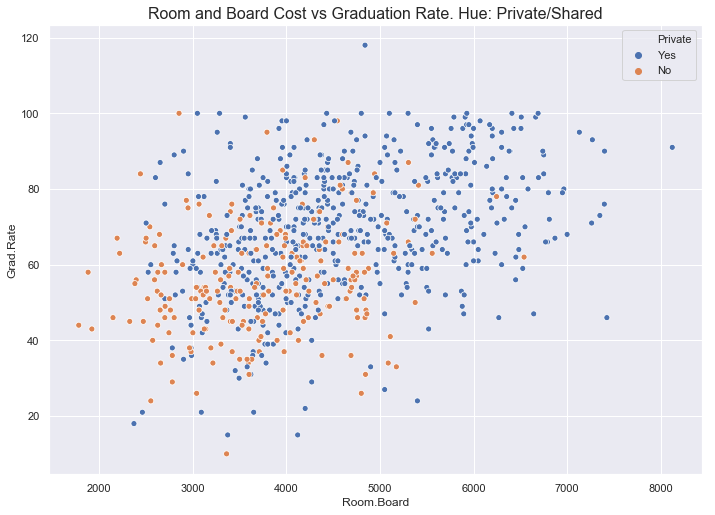

In [35]:
sns.scatterplot('Room.Board','Grad.Rate', data=df, hue='Private')
plt.title('Room and Board Cost vs Graduation Rate. Hue: Private/Shared', fontsize=16)

**Observations**
- People with private rooms had a higher graduation rate      Possibly due to less distractions from roommates?
- People living in more expensive environments had a higher graduation rate

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

Text(0.5, 1.0, 'F.Undergrad versus Outstate. Hue: Private vs Shared')

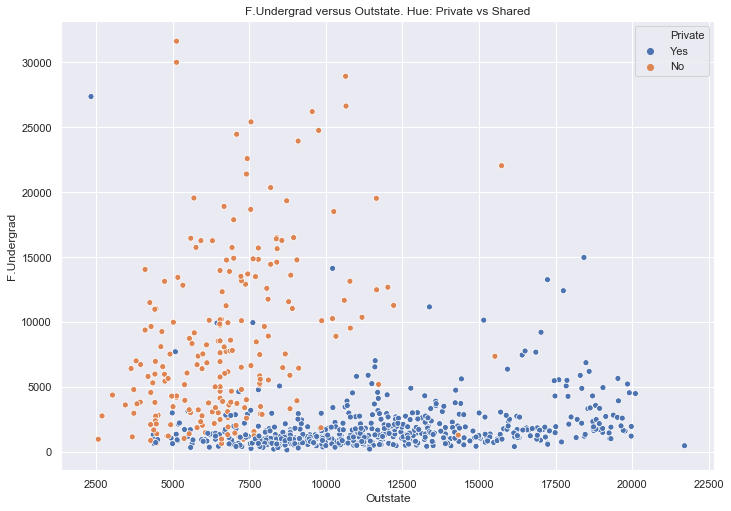

In [38]:
sns.scatterplot('Outstate', 'F.Undergrad', data=df, hue='Private')
plt.title('F.Undergrad versus Outstate. Hue: Private vs Shared', fontsize=16)

**Observations**
- It clearly seems like there are 2 group of data on this graph so I tried different hues until I found one that explained the grouping. 
- There are a lot undergrads in Private universites.       WHO HAS THAT KIND OF MONEY

Text(0.5, 1.0, 'Histogram of Out of State tuition')

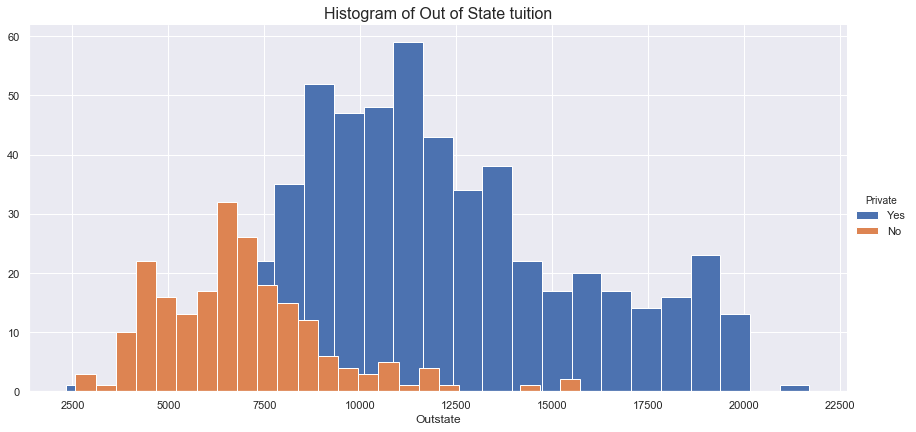

In [98]:
g = sns.FacetGrid(df[['Outstate', 'Private', 'Grad.Rate']], hue='Private', height=6, aspect=2.0)
g.map(plt.hist, 'Outstate', bins=25).add_legend()
plt.title('Histogram of Out of State tuition', fontsize=16)

Text(0.5, 1.0, 'Histogram of Grad.Rate')

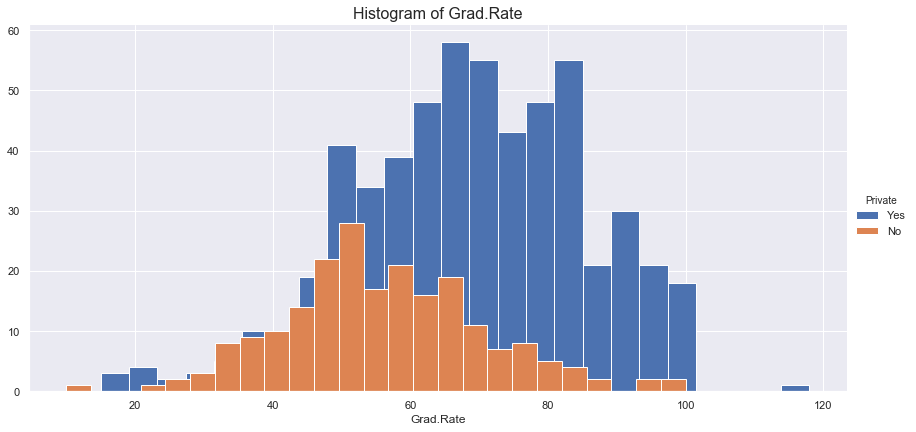

In [101]:
g = sns.FacetGrid(df[['Outstate', 'Private', 'Grad.Rate']], hue='Private', height=6, aspect=2.0)
g.map(plt.hist, 'Grad.Rate', bins=25).add_legend()
plt.title('Histogram of Grad.Rate', fontsize=16)

**Observation**
- Private schools have a higher graduation rate
- **Outlier: There is a school with a graduation rate higher than 100%...**

**Changing that entry so that it equals 100**

In [130]:
df.loc[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [171]:
name = df.loc[df['Grad.Rate'] > 100].index[0]
df.loc[name, 'Grad.Rate'] = 100

## K Means Cluster Creation

In [148]:
Km = KMeans(n_clusters=2, random_state=50, n_init=100, max_iter=1000)
X = df.drop('Private', axis=1)
y = df['Private']

**Fit the model.**

In [149]:
Km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

** What are the cluster center vectors?**

In [150]:
Km.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

## Evaluation

**Normally wouldn't be able to do this since I wouldn't have the real values**

In [173]:
'''Modifies df to include predicted values and creates dummy values for Private Column'''

df['Predicted Private'] = Km.predict(X)
df = pd.get_dummies(df, columns=['Private'], drop_first=True)

In [175]:
df[['Predicted Private', 'Private_Yes']].head()

,Predicted Private,Private_Yes
Abilene Christian University,1,1
Adelphi University,1,1
Adrian College,1,1
Agnes Scott College,1,1
Alaska Pacific University,1,1


In [178]:
print(confusion_matrix(df['Private_Yes'], df['Predicted Private']))
print(classification_report(df['Private_Yes'], df['Predicted Private']))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

   micro avg       0.78      0.78      0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

